## 문제: Matrix Inverse Method 회귀모델

데이터가 다음과 같이 주어졌을 때:
* x [1,2],[1,4],[1,6]
* y 3,6,7

회귀식을 도출해보자.
* 1) matrix inverse method로 $\hat{w}$을 계산,
* 2) 예측과 실제의 오류 합계를 계산,
* 2) 입력 데이터와 회귀선의 그래프를 작성한다.

### (1) 데이터

In [1]:
import numpy as np

x1=np.array([[1,2],[1,4],[1,6]]) #행3 열2
y1=np.array([3,6,7])

### (2) 데이터 구성 확인

x데이터는 행에 레코드, 열에 속성이 오도록 해야 한다.

In [3]:
print(x1.shape,y1.shape)

(3, 2) (3,)


컬럼에는 상수항과 속성의 순서에 유의한다.

In [4]:
print("x1:\n", x1)

x1:
 [[1 2]
 [1 4]
 [1 6]]


### (3) w 계산

w0은 x0, w1은 x1에 대해 계산한다.
```X.T*X```는 ```dot()```함수로 연산을 한다.

In [5]:
xTx=np.dot(x1.T,x1)
print("xTx=\n",xTx)

xTx=
 [[ 3 12]
 [12 56]]


그 값의 inverse를 구한다.

In [6]:
xTxI=np.linalg.inv(xTx)
print("xTxI=\n",xTxI)

xTxI=
 [[ 2.33333333 -0.5       ]
 [-0.5         0.125     ]]


```X.T*Y``` 역시 array는 ```dot()```함수로 연산을 한다.

In [7]:
xTyT=np.dot(x1.T,y1)
print("xTyT=",xTyT)

xTyT= [16 72]


위 계산을 가져와 weights를 구해보자.

In [9]:
print("weights=",np.dot(xTxI,xTyT)) # 2x2 dot 2x1 -> 2x1

weights= [1.33333333 1.        ]


### 줄여서 계산

앞서는 계산과정을 한 줄씩 해보았지만, 이번에는 줄여서 한 줄로 해보자.
입력 컬럼에 해당하는 가중치 $y= w_0 \times x_0 + w_1\times x_1$ 순서대로 출력한다.
즉, $w_0$은 첫째 컬럼인 절편 $x_0$, $w_1$은 둘째 컬럼인 $x_1$에 대한 계수이다.

In [10]:
w0, w1=np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1)) #1.3 1.0

In [11]:
f"w0:{w0} w1:{w1}"

'w0:1.3333333333333286 w1:1.0'

### 추가: matrix로 계산

지금까지는 array로 풀어보았다. 이번에는 matrix() 함수로 데이터를 만들고, matrix 연산을 해보자.

In [12]:
import numpy as np
X=np.matrix([[1,2],[1,4],[1,6]])
Y=np.matrix([3,6,7])

In [13]:
xTx=X.T*X

matrix의 역행렬은 간편하게 ```I``` 로 계산하고 있다.

In [14]:
xTxI=xTx.I  #inversible as xTx.det() (3*56 - 12*12) != 0

In [15]:
xTyT=X.T*Y.T

위와 동일한 계수가 계산되었다.

In [16]:
print("weights=",xTxI*xTyT) #1.33 1.00 thus y=1.33+1.00x1+e

weights= [[1.33333333]
 [1.        ]]


###  numpy listsq

In [17]:
w0, w1 = np.linalg.lstsq(x1, y1, rcond=None)[0]
print(w0,w1)

1.3333333333333306 1.0000000000000004


### (4) 예측

#### 항목별 예측 계산

먼저 상수항을 제거하고 속성만 꺼내보자.

In [18]:
x=x1[:,1]  #[2, 4, 6]  #상수항(1)은 필요가 없다!! # 모든 행에 대하여 1번째 column

속성이 하나라서 식이 간단하지만, 속성을 순서대로 w와 연산해서 예측값을 계산한다.

In [19]:
yhat=w0+w1*x

In [20]:
f"predicted yhat: {yhat}"

'predicted yhat: [3.33333333 5.33333333 7.33333333]'

#### 벡터로 예측 계산

벡터로 계산해보자.

##### shape 정열

우선 w를 array로 만들어 준다.

In [21]:
w=np.array([w0,w1])

x1,w의 ```dot()``` 연산을 하기 위해 차원을 맞추어 준다.

In [22]:
f"x1.shape:{x1.shape} w.shape: {w.shape}"

'x1.shape:(3, 2) w.shape: (2,)'

(2, ) -> (2, 1)로 맞추어 주면, **(3, 2), (2, 1) -> (3, 1)** 연산이 된다.
np.newaxis로 차원을 맞추어 준다.

> 1차원 Transpose

> 1차원의 ```x.T*x```를 구해보자.
numpy array **1d**는 ```[...,...,...]``` 형식으로 구성된다.
**1d는 transpose를 해도 변환이 되지 않는다**.
이럴 경우 ```[[],[]]```로 만들어 trasnpose해야 한다.
np.newaxis 명령어로 ```[]```를 추가해서 ```[[],[]]```으로 변환해준다.
```python
x=np.array([1,2,3,4])
x[:, np.newaxis]
```
그 결과 [1,2,3,4]가 ([[1],[2],[3],[4]])로 변환이 된다.

In [23]:
w=w[:, np.newaxis]

In [24]:
f"w.shape: {w.shape}"

'w.shape: (2, 1)'

In [25]:
w

array([[1.33333333],
       [1.        ]])

###### 예측 계산

dot()연산으로 **예측치**를 출력할 수 있다.

In [26]:
pred=np.dot(x1,w)

In [27]:
f"predicted yhat: {pred}"

'predicted yhat: [[3.33333333]\n [5.33333333]\n [7.33333333]]'

y1 역시 차원을 맞추어 pred과 뺄셈 연산이 가능하도록 하자.

In [28]:
_y1=y1[:,np.newaxis]

백터로 계산한 오류는 앞서의 결과와 동일하다.

In [29]:
_y1 - pred

array([[-0.33333333],
       [ 0.66666667],
       [-0.33333333]])

### (5) 오류 계산

In [39]:
print("SSE sum of squared errors: {}".format(np.sum(np.power(yhat-y1,2)))) # 실제-예측 후 제곱

SSE sum of squared errors: 0.6666666666666667


#### 반복문으로 하나씩 계산

오류는 실제 y와 예측과 얼마나 차이가 있는지를 보여준다.
물론 벡터는 반복문을 사용하지 않아도 연산이 가능하다.
아래는 반복문을 사용하여 각 y값의 오류를 출력하고 있다.
```format()``` 함수는 인자의 순서와 출력형식을 설정해서 출력하여 준다.
예를 들어, **```{1:.2f}```**는 두 번째 float를 소수점 2자리로 출력하게 된다.

In [40]:
print ("i\t오류\ty\t예측")
print ("--\t-----\t-----\t-----")
for i in range(len(x1)):
    predicted=w0*x1[i][0] + w1*x1[i][1]
    error=y1[i]-predicted
    print("{0:2d}\t{1:.2f} =\t {2}  -\t{3:.2f}".format(i,error,y1[i],predicted))

i	오류	y	예측
--	-----	-----	-----
 0	-0.33 =	 3  -	3.33
 1	0.67 =	 6  -	5.33
 2	-0.33 =	 7  -	7.33


### 정리하면

회귀선을 numpy 최소자승법으로 구하고, 실제 데이터와 같이 그래프를 그려보자.

predicted yhat: [3.33333333 5.33333333 7.33333333]
SSE sum of squared errors: 0.6666666666666666


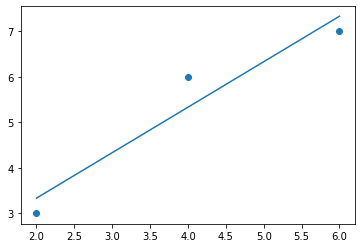

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# (1) data ready
x1=np.array([[1,2],[1,4],[1,6]])
y1=np.array([3,6,7])
#_x=np.array([x,np.ones(len(x))]) # shape (2,4)
# (2) shape is right already (column:x0,x1 row:records)
# (3) compute w (w0 for x0, w1 for x1)
#w0,w1=np.linalg.lstsq(x1, y1, rcond=None)[0]
w0, w1=np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1)) #1.3 1.0
# (4) predicted
x=x1[:,1]  #[2, 4, 6]
yhat=w0+w1*x
print("predicted yhat: {}".format(yhat))
# (5) error
print("SSE sum of squared errors: {}".format(np.sum(np.power(yhat-y1,2))))
# (6) graph
fig=plt.figure()
ax=fig.add_subplot(111) #행1 열1의 처음에 있는 그래프에 그림을 그린다
ax.scatter(x,y1)
ax.plot(x,yhat)